In [100]:
import librosa
import numpy as np
import soundfile as sf
import os
import webrtcvad
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def extract_overlapping_snippets(audio_path, snippet_duration=1.0,overlap=0.5,sr=44100):
    audio, sr = librosa.load(audio_path, sr=sr)
    snippet_samples = int(snippet_duration * sr)
    step_size = int(snippet_samples*(1-overlap))

    snippets = []
    for start in range(0, len(audio)-snippet_samples+1,step_size):
        snippet = audio[start:start+snippet_samples]
        snippets.append(snippet)
    
    return snippets, sr

In [ ]:
def extract_non_silent_snippets(audio_path, snippet_duration=1.0, overlap=0.5, sr=16000, top_db=30):
    """
    Extracts non-silent overlapping audio snippets from an audio file.

    Parameters:
    - audio_path: Path to the audio file.
    - snippet_duration: Duration of each snippet in seconds.
    - overlap: Fraction of overlap (e.g., 0.5 means 50% overlap).
    - sr: Sample rate to which the audio should be resampled.
    - top_db: Threshold for silence detection (lower = more strict).

    Returns:
    - List of extracted non-silent audio snippets.
    """
    # Load audio
    audio, sr = librosa.load(audio_path, sr=sr)
    
    # Detect non-silent parts
    non_silent_intervals = librosa.effects.split(audio, top_db=top_db)

    snippet_samples = int(snippet_duration * sr)  # Convert duration to samples
    step_size = int(snippet_samples * (1 - overlap))  # Overlap step size

    snippets = []
    for interval in non_silent_intervals:
        start_sample, end_sample = interval  # Non-silent segment
        for start in range(start_sample, end_sample - snippet_samples + 1, step_size):
            snippet = audio[start:start + snippet_samples]
            snippets.append(snippet)

    return snippets, sr

In [77]:
def is_speech(audio_segment, sr=16000, mode=3):
    """
    Uses WebRTC VAD to check if an audio segment contains speech.
    
    Parameters:
    - audio_segment: A small audio segment in raw PCM format.
    - sr: Sample rate (must be 16000Hz for VAD).
    - mode: Aggressiveness (0 = least, 3 = most aggressive).
    
    Returns:
    - Boolean (True = speech detected, False = silence).
    """
    vad = webrtcvad.Vad(mode)

    # Ensure correct sample rate
    if sr not in [8000, 16000, 32000, 48000]:
        raise ValueError("WebRTC VAD only supports sample rates of 8000, 16000, 32000, or 48000 Hz")

    # Convert audio to bytes (16-bit PCM)
    audio_bytes = audio_segment.tobytes()

    # WebRTC VAD requires frame sizes of 10ms, 20ms, or 30ms
    frame_duration = 30  # Use 30ms for more accuracy
    frame_size = int(sr * (frame_duration / 1000))  # Number of samples in 30ms

    # Process each frame separately
    for i in range(0, len(audio_segment), frame_size):
        frame = audio_bytes[i:i + frame_size * 2]  # 2 bytes per sample (16-bit PCM)
        if len(frame) < frame_size * 2:
            continue  # Ignore incomplete frames
        if vad.is_speech(frame, sr):
            return True  # Speech detected

    return False  # No speech detected

# Example usage inside a snippet extraction function
def extract_speech_snippets(audio_path, snippet_duration=1.0, overlap=0.5, sr=16000):
    audio, sr = librosa.load(audio_path, sr=sr)  # Resample to 16kHz
    snippet_samples = int(snippet_duration * sr)
    step_size = int(snippet_samples * (1 - overlap))

    snippets = []
    for start in range(0, len(audio) - snippet_samples + 1, step_size):
        snippet = audio[start:start + snippet_samples]
        
        # Convert snippet to int16 PCM for VAD
        snippet_pcm = np.int16(snippet * 32768)
        if is_speech(snippet_pcm, sr):
            snippets.append(snippet)

    return snippets, sr

# Run the functio

In [78]:
audio_file = "C:/Nini/Capstone/AudioFiles/Actor_01/01-01-08-01-01-01-01.wav"

In [79]:
snippets, sample_rate = extract_speech_snippets(audio_file)
for i, snippet in enumerate(snippets):
    sf.write(f"C:/Nini/Capstone/{audio_file.split('/')[5].split('.')[0]}_{i}.wav", snippet, sample_rate)

In [80]:
dataset = "C:/Nini/Capstone/AudioFiles/"
dataset_folders = os.listdir(dataset)
dataset_folders.sort()
dataset_folders

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [ ]:
data_folder = "C:/Nini/Capstone/AudioFiles"
dataset_folder = "C:/Nini/Capstone/AudioFilesSnippets"

In [82]:
for folder in os.listdir(data_folder):
    if os.path.isdir(f'{data_folder}/{folder}'):
        folder_path = f'{data_folder}/{folder}'
        dest_folder_path = f'{dataset_folder}/{folder}'
        os.makedirs(dest_folder_path,exist_ok=True)
        for file in os.listdir(folder_path):
            print(f'{folder_path}/{file}')
            audio_file = f'{folder_path}/{file}'
            snippets, sample_rate = extract_speech_snippets(audio_file)
            for i, snippet in enumerate(snippets):
                sf.write(f"{dest_folder_path}/{audio_file.split('/')[3].split('.')[0]}_{i}.wav", snippet, sample_rate)

../AudioFiles/Actor_01/01-01-01-01-01-01-01.wav
../AudioFiles/Actor_01/01-01-01-01-01-02-01.wav
../AudioFiles/Actor_01/01-01-01-01-02-01-01.wav
../AudioFiles/Actor_01/01-01-01-01-02-02-01.wav
../AudioFiles/Actor_01/01-01-02-01-01-01-01.wav
../AudioFiles/Actor_01/01-01-02-01-01-02-01.wav
../AudioFiles/Actor_01/01-01-02-01-02-01-01.wav
../AudioFiles/Actor_01/01-01-02-01-02-02-01.wav
../AudioFiles/Actor_01/01-01-02-02-01-01-01.wav
../AudioFiles/Actor_01/01-01-02-02-01-02-01.wav
../AudioFiles/Actor_01/01-01-02-02-02-01-01.wav
../AudioFiles/Actor_01/01-01-02-02-02-02-01.wav
../AudioFiles/Actor_01/01-01-03-01-01-01-01.wav
../AudioFiles/Actor_01/01-01-03-01-01-02-01.wav
../AudioFiles/Actor_01/01-01-03-01-02-01-01.wav
../AudioFiles/Actor_01/01-01-03-01-02-02-01.wav
../AudioFiles/Actor_01/01-01-03-02-01-01-01.wav
../AudioFiles/Actor_01/01-01-03-02-01-02-01.wav
../AudioFiles/Actor_01/01-01-03-02-02-01-01.wav
../AudioFiles/Actor_01/01-01-03-02-02-02-01.wav
../AudioFiles/Actor_01/01-01-04-01-01-01

In [83]:
neutral_count = 0
calm_count = 0
happy_count = 0
sad_count = 0
angry_count = 0
fearful_count = 0
disgust_count = 0
surprised_count = 0
for folder in os.listdir(dataset_folder):
    folder_path = f'{dataset_folder}/{folder}'
    for file in os.listdir(folder_path):
        file_name = file.split('-')
        if file_name[2] == '01':
            neutral_count += 1
        elif file_name[2] == '02':
            calm_count += 1
        elif file_name[2] == '03':
            happy_count += 1
        elif file_name[2] == '04':
            sad_count += 1
        elif file_name[2] == '05':
            angry_count += 1
        elif file_name[2] == '06':
            fearful_count += 1
        elif file_name[2] == '07':
            disgust_count += 1
        elif file_name[2] == '08':
            surprised_count += 1

print(f'Neutral: {neutral_count}')
print(f'Calm: {calm_count}')
print(f'Happy: {happy_count}')
print(f'Sad: {sad_count}')
print(f'Angry: {angry_count}')
print(f'Fearful: {fearful_count}')
print(f'Disgust: {disgust_count}')
print(f'Surprised: {surprised_count}')
        

Neutral: 300
Calm: 566
Happy: 730
Sad: 658
Angry: 813
Fearful: 708
Disgust: 796
Surprised: 666


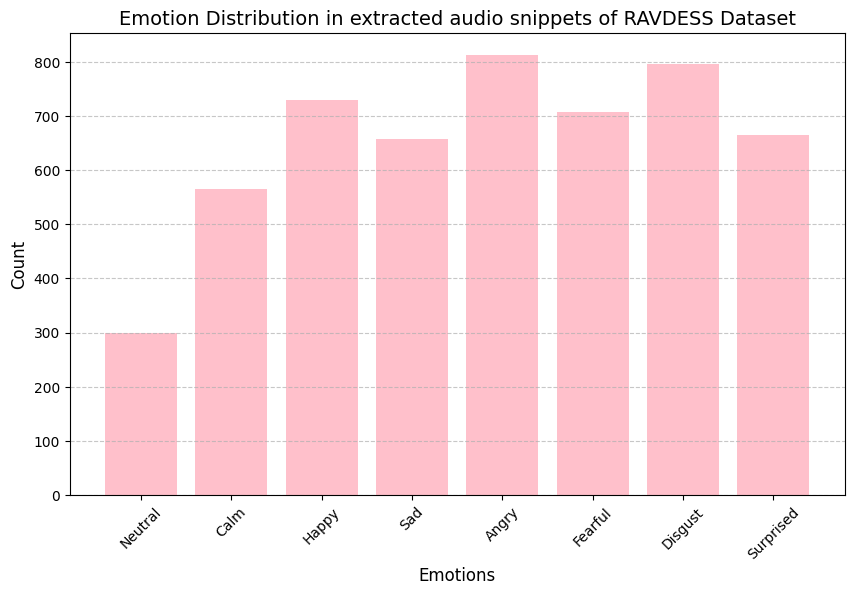

In [84]:
emotion_counts = {
    'Neutral': neutral_count,
    'Calm': calm_count,
    'Happy': happy_count,
    'Sad': sad_count,
    'Angry': angry_count,
    'Fearful': fearful_count,
    'Disgust': disgust_count,
    'Surprised': surprised_count
}

plt.figure(figsize=(10,6))
plt.bar(emotion_counts.keys(),emotion_counts.values(),color='pink')

plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Emotion Distribution in extracted audio snippets of RAVDESS Dataset', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [114]:
dataset = "C:/Nini/Capstone/AudioFilesSnippets/"
dataset_folders = os.listdir(dataset)
dataset_folders.sort()
dataset_folders

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [115]:
emotions = []
gender = []
actor_ID = []
file_path = []
for folder in dataset_folders:
    file_name = os.listdir(dataset+folder)
    for file in file_name:
        filename = file.split('.')[0].split('-')
        emotions.append(int(filename[2]))
        actor_ID.append(int(filename[6]))
        bg = int(filename[6])
        if bg%2 == 0:
            gd = 'female'
        else:
            gd = 'male'
        gender.append(gd)
        file_path.append(dataset+folder+'/'+file)

print(emotions,gender,actor_ID,file_path)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 

In [116]:
audio_df = pd.DataFrame(emotions)
audio_df = audio_df.replace({1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fearful',7:'disgust',8:'surprised'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor_ID)],axis=1)
audio_df.columns = ['Gender','Emotion','Actor_ID']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns=['Path'])],axis=1)
audio_df

,Gender,Emotion,Actor_ID,Path
0,female,neutral,10,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-01-01_0.wav
1,male,neutral,11,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-01-01_1.wav
2,female,neutral,12,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-01-01_2.wav
3,female,neutral,10,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-02-01_0.wav
4,male,neutral,11,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-02-01_1.wav
...,...,...,...,...
5232,female,surprised,240,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-08-02-02-02-24_0.wav
5233,male,surprised,241,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-08-02-02-02-24_1.wav
5234,female,surprised,242,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-08-02-02-02-24_2.wav
5235,male,surprised,243,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-08-02-02-02-24_3.wav


In [117]:
pd.set_option('display.max_colwidth', 1)

audio_df.sample(10)

,Gender,Emotion,Actor_ID,Path
4333,male,happy,213,C:/Nini/Capstone/AudioFilesSnippets/Actor_21/01-01-03-01-01-02-21_3.wav
577,female,sad,32,C:/Nini/Capstone/AudioFilesSnippets/Actor_03/01-01-04-02-02-02-03_2.wav
4247,female,disgust,202,C:/Nini/Capstone/AudioFilesSnippets/Actor_20/01-01-07-02-02-02-20_2.wav
3829,female,surprised,182,C:/Nini/Capstone/AudioFilesSnippets/Actor_18/01-01-08-01-01-02-18_2.wav
3668,male,happy,181,C:/Nini/Capstone/AudioFilesSnippets/Actor_18/01-01-03-01-02-02-18_1.wav
5194,male,disgust,241,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-07-02-01-02-24_1.wav
760,male,happy,41,C:/Nini/Capstone/AudioFilesSnippets/Actor_04/01-01-03-01-01-01-04_1.wav
1832,female,angry,90,C:/Nini/Capstone/AudioFilesSnippets/Actor_09/01-01-05-02-01-01-09_0.wav
3731,female,angry,180,C:/Nini/Capstone/AudioFilesSnippets/Actor_18/01-01-05-01-02-01-18_0.wav
5109,male,angry,243,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-05-01-02-02-24_3.wav


In [118]:
audio_df.to_csv(f'C:/Nini/Capstone/CSV_Files/ravdess_dataset_snippets.csv')

In [119]:
df = pd.DataFrame(columns=['mel_spectrogram'])
counter = 0
for index, path in enumerate(audio_df.Path):
    X, sample_rate = librosa.load(path,res_type='kaiser_fast',duration=3,sr=16000,offset=0.5)
    # print(sample_rate)
    spectrogram = librosa.feature.melspectrogram(y=X,sr=sample_rate,n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    log_spectrogram = np.mean(db_spec,axis=1)
    df.loc[counter] = [log_spectrogram]
    counter += 1

print(len(df))
print(df.head())

5237
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [120]:
print(counter)
print(spectrogram.shape)
print(db_spec.shape)
print(log_spectrogram.shape)
print(len(log_spectrogram))
log_spectrogram

5237
(128, 16)
(128, 16)
(128,)
128


array([-48.031303, -47.430805, -50.35661 , -51.09178 , -56.993458,
       -58.304226, -59.901646, -60.905876, -61.377945, -59.93245 ,
       -60.97785 , -63.199757, -64.9135  , -66.42602 , -64.63027 ,
       -62.619225, -61.860764, -66.55159 , -67.92459 , -66.95203 ,
       -67.216644, -65.96382 , -65.753784, -69.1311  , -70.82384 ,
       -71.29912 , -73.82335 , -72.066086, -72.47828 , -72.61035 ,
       -72.92247 , -73.0152  , -74.90192 , -74.69154 , -73.14912 ,
       -72.88187 , -72.907974, -72.95416 , -72.268005, -76.015945,
       -72.69056 , -72.18321 , -72.07124 , -72.4554  , -73.09851 ,
       -71.51753 , -71.106255, -72.99924 , -75.10432 , -74.84331 ,
       -74.75154 , -75.11708 , -74.43034 , -73.5535  , -71.60349 ,
       -72.40808 , -74.50797 , -74.08293 , -74.11803 , -73.808044,
       -73.104614, -72.33906 , -73.76784 , -73.69905 , -74.1228  ,
       -74.00415 , -74.52459 , -74.63476 , -73.58507 , -73.71982 ,
       -73.88539 , -73.19631 , -74.36487 , -75.44611 , -76.430

In [121]:
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [122]:
df_combined

,Gender,Emotion,Actor_ID,Path,0,1,2,3,4,5,...,118,119,120,121,122,123,124,125,126,127
0,female,neutral,10,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-01-01_0.wav,-52.786026,-45.583466,-34.059448,-14.904263,-11.806824,-22.142227,...,-56.309513,-57.390167,-58.488060,-60.099617,-60.151154,-60.875916,-62.112232,-63.985191,-67.480797,-76.188751
1,male,neutral,11,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-01-01_1.wav,-55.714336,-47.235538,-32.437531,-25.120844,-34.152279,-44.781273,...,-62.223724,-62.982018,-64.901352,-67.620979,-68.529961,-68.802254,-68.460358,-68.545158,-72.763809,-77.703949
2,female,neutral,12,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-01-01_2.wav,-60.636795,-61.195198,-62.003254,-65.503357,-71.087914,-73.080811,...,-80.318283,-80.702530,-80.648575,-78.618378,-76.837387,-77.163605,-77.969223,-73.346466,-68.828125,-70.682236
3,female,neutral,10,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-02-01_0.wav,-53.665459,-44.370083,-37.727516,-19.209730,-9.802891,-15.656280,...,-53.694550,-56.618530,-57.135021,-56.559925,-56.685368,-58.046844,-59.424576,-60.267944,-64.614853,-72.598602
4,male,neutral,11,C:/Nini/Capstone/AudioFilesSnippets/Actor_01/01-01-01-01-01-02-01_1.wav,-54.774132,-42.125359,-29.733917,-20.767223,-30.779823,-40.504662,...,-63.036583,-62.781586,-65.565956,-67.299057,-68.918930,-67.758018,-66.909653,-68.634125,-73.586884,-77.373817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,female,surprised,240,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-08-02-02-02-24_0.wav,-35.712105,-36.294437,-38.212585,-39.106255,-37.814335,-36.495377,...,-22.891911,-25.359253,-26.404585,-25.933510,-26.523693,-26.007418,-24.869946,-23.308065,-26.815243,-39.181301
5233,male,surprised,241,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-08-02-02-02-24_1.wav,-37.976440,-39.050537,-41.419624,-40.938904,-41.593147,-40.745308,...,-28.822304,-27.888407,-27.198511,-26.403893,-26.009075,-26.352951,-26.517067,-27.412912,-31.576902,-42.575729
5234,female,surprised,242,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-08-02-02-02-24_2.wav,-36.226646,-35.048828,-36.120079,-36.618713,-38.205963,-37.881142,...,-39.031258,-40.327133,-41.799171,-42.542671,-41.710320,-41.099983,-40.265686,-40.548637,-44.673485,-55.142059
5235,male,surprised,243,C:/Nini/Capstone/AudioFilesSnippets/Actor_24/01-01-08-02-02-02-24_3.wav,-26.033216,-30.436846,-36.966553,-39.854797,-43.399471,-43.933174,...,-61.873070,-61.166832,-61.051239,-60.561104,-60.463730,-59.983810,-60.235687,-59.888618,-62.170502,-66.763168


In [123]:
df_combined.drop(columns='Path',inplace=True)
df_combined.head()

,Gender,Emotion,Actor_ID,0,1,2,3,4,5,6,...,118,119,120,121,122,123,124,125,126,127
0,female,neutral,10,-52.786026,-45.583466,-34.059448,-14.904263,-11.806824,-22.142227,-26.915251,...,-56.309513,-57.390167,-58.488060,-60.099617,-60.151154,-60.875916,-62.112232,-63.985191,-67.480797,-76.188751
1,male,neutral,11,-55.714336,-47.235538,-32.437531,-25.120844,-34.152279,-44.781273,-35.628056,...,-62.223724,-62.982018,-64.901352,-67.620979,-68.529961,-68.802254,-68.460358,-68.545158,-72.763809,-77.703949
2,female,neutral,12,-60.636795,-61.195198,-62.003254,-65.503357,-71.087914,-73.080811,-68.991425,...,-80.318283,-80.702530,-80.648575,-78.618378,-76.837387,-77.163605,-77.969223,-73.346466,-68.828125,-70.682236
3,female,neutral,10,-53.665459,-44.370083,-37.727516,-19.209730,-9.802891,-15.656280,-27.147839,...,-53.694550,-56.618530,-57.135021,-56.559925,-56.685368,-58.046844,-59.424576,-60.267944,-64.614853,-72.598602
4,male,neutral,11,-54.774132,-42.125359,-29.733917,-20.767223,-30.779823,-40.504662,-30.872259,...,-63.036583,-62.781586,-65.565956,-67.299057,-68.918930,-67.758018,-66.909653,-68.634125,-73.586884,-77.373817


In [124]:
df_combined.to_csv(f'C:/Nini/Capstone/CSV_Files/ravdess_dataset_preprocessed_snippets.csv')

In [125]:
X = df_combined.iloc[:,3:]
Y = df_combined.iloc[:,:2].drop(columns=['Gender'])

In [126]:
X

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-52.786026,-45.583466,-34.059448,-14.904263,-11.806824,-22.142227,-26.915251,-22.946404,-13.897753,-13.925696,...,-56.309513,-57.390167,-58.488060,-60.099617,-60.151154,-60.875916,-62.112232,-63.985191,-67.480797,-76.188751
1,-55.714336,-47.235538,-32.437531,-25.120844,-34.152279,-44.781273,-35.628056,-31.840992,-29.111500,-36.053459,...,-62.223724,-62.982018,-64.901352,-67.620979,-68.529961,-68.802254,-68.460358,-68.545158,-72.763809,-77.703949
2,-60.636795,-61.195198,-62.003254,-65.503357,-71.087914,-73.080811,-68.991425,-71.236877,-73.249496,-74.580658,...,-80.318283,-80.702530,-80.648575,-78.618378,-76.837387,-77.163605,-77.969223,-73.346466,-68.828125,-70.682236
3,-53.665459,-44.370083,-37.727516,-19.209730,-9.802891,-15.656280,-27.147839,-27.646265,-18.840073,-12.771875,...,-53.694550,-56.618530,-57.135021,-56.559925,-56.685368,-58.046844,-59.424576,-60.267944,-64.614853,-72.598602
4,-54.774132,-42.125359,-29.733917,-20.767223,-30.779823,-40.504662,-30.872259,-27.131371,-28.143581,-32.508743,...,-63.036583,-62.781586,-65.565956,-67.299057,-68.918930,-67.758018,-66.909653,-68.634125,-73.586884,-77.373817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,-35.712105,-36.294437,-38.212585,-39.106255,-37.814335,-36.495377,-36.790318,-36.250233,-34.055244,-30.757334,...,-22.891911,-25.359253,-26.404585,-25.933510,-26.523693,-26.007418,-24.869946,-23.308065,-26.815243,-39.181301
5233,-37.976440,-39.050537,-41.419624,-40.938904,-41.593147,-40.745308,-40.255524,-36.855854,-29.571152,-26.732876,...,-28.822304,-27.888407,-27.198511,-26.403893,-26.009075,-26.352951,-26.517067,-27.412912,-31.576902,-42.575729
5234,-36.226646,-35.048828,-36.120079,-36.618713,-38.205963,-37.881142,-35.383251,-30.318928,-23.202581,-21.275991,...,-39.031258,-40.327133,-41.799171,-42.542671,-41.710320,-41.099983,-40.265686,-40.548637,-44.673485,-55.142059
5235,-26.033216,-30.436846,-36.966553,-39.854797,-43.399471,-43.933174,-46.239754,-43.646370,-35.272598,-29.359190,...,-61.873070,-61.166832,-61.051239,-60.561104,-60.463730,-59.983810,-60.235687,-59.888618,-62.170502,-66.763168


In [127]:
Y

,Emotion
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral
...,...
5232,surprised
5233,surprised
5234,surprised
5235,surprised


In [128]:
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X - mean)/std

In [129]:
extracted_features = pd.concat([X,Y],axis=1)

In [130]:
extracted_features

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Emotion
0,-0.761053,0.061246,0.987961,1.976733,1.904703,1.026698,0.477335,0.598487,0.927866,0.877900,...,-0.101551,-0.170623,-0.281768,-0.296716,-0.342014,-0.423842,-0.566039,-0.681285,-1.012861,neutral
1,-0.987029,-0.091738,1.123508,1.276300,0.540515,-0.300174,-0.004582,0.127678,0.169147,-0.200578,...,-0.456146,-0.579094,-0.765130,-0.840668,-0.858475,-0.841501,-0.876110,-1.065310,-1.151825,neutral
2,-1.366893,-1.384418,-1.347355,-1.492263,-1.714403,-1.958806,-1.849958,-1.957632,-2.032043,-2.078343,...,-1.579854,-1.582056,-1.471880,-1.379986,-1.403280,-1.467113,-1.202592,-0.779223,-0.507839,neutral
3,-0.828918,0.173606,0.681414,1.681556,2.027043,1.406839,0.464471,0.349714,0.681389,0.934136,...,-0.052619,-0.084446,-0.054289,-0.071717,-0.157678,-0.247015,-0.313271,-0.472958,-0.683595,neutral
4,-0.914474,0.381470,1.349454,1.574777,0.746403,-0.049522,0.258468,0.376968,0.217418,-0.027813,...,-0.443436,-0.621424,-0.744441,-0.865920,-0.790435,-0.739476,-0.882160,-1.125140,-1.121547,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,0.556533,0.921420,0.640876,0.317481,0.316947,0.185462,-0.068869,-0.105713,-0.077401,0.057548,...,1.929619,1.872817,1.913924,1.886378,1.929934,2.026420,2.199948,2.274715,2.381225,surprised
5233,0.381795,0.666202,0.372857,0.191838,0.086250,-0.063626,-0.260534,-0.137770,0.146224,0.253695,...,1.769239,1.822251,1.883695,1.919787,1.907420,1.918051,1.920824,1.928588,2.069910,surprised
5234,0.516826,1.036765,0.815751,0.488023,0.293038,0.104242,0.008958,0.208244,0.463828,0.519657,...,0.980464,0.892315,0.846533,0.900463,0.946539,1.013496,1.027613,0.976590,0.917407,surprised
5235,1.303448,1.463840,0.745009,0.266162,-0.024026,-0.250467,-0.591530,-0.497207,-0.138111,0.125692,...,-0.341040,-0.333875,-0.311425,-0.317008,-0.283886,-0.300380,-0.287478,-0.295277,-0.148407,surprised


In [131]:
extracted_features.to_csv(f'C:/Nini/Capstone/CSV_Files/ravdess_extracted_features_snippets.csv')